In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicHermiteSpline

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Edwar Isaías Pacheco Rojas
### CC: 1017240283
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}I}{\mathrm{d}t} + RI
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``I = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [ ]:
def diferencias_finitas(t: np.ndarray, i:np.ndarray) -> np.ndarray:

  """
  Calcular la derivada de y respecto a x por diferencias finitas.
  Hacia adelante para el primer punto; hacia atrás en el último, y central para
  los puntos medios.

  Args:
    :x: Array con los valores del dominio
    :y: Array con los valores de función

  Returns:
    Derivadas de y respecto a x en x para un conjunto de valores dados.
  """

  n = len(t)  # Cantidad de puntos
  derivadas = np.zeros_like(t)
  for k in range(n):

    # Diferencia finita hacia adelante
    if k == 0:
      derivadas[k] = (i[k + 1] - i[k]) / (t[k + 1] - t[k])
    # Diferencia finita hacia atrás
    elif k == n - 1:
      derivadas[k] = (i[k] - i[k - 1]) / (t[k] - t[k - 1])
    # Diferencia finita central
    else:
      derivadas[k] = (i[k + 1] - i[k - 1]) / (2 * (t[k + 1] - t[k]))

  return derivadas


def deriv_three_points(t: np.ndarray, i:np.ndarray) -> np.ndarray:

  """
  Derivada numérica por el método de los tres puntos.
  Diferencia finita hacia adelante en el primer punto; hacia atrás en el último,
  y central para los puntos intermedios.

  Args:
  :t: Array con los valores del dominio
  :i: Array con los valores de función

  Returns:
    Derivadas de y respecto a x en x para un conjunto de valores dados.
  """

  n = len(t)  # Cantidad de puntos
  derivadas = np.zeros_like(t)
  for k in range(n):

    # Diferencia finita hacia adelante
    if k == 0:
      derivadas[k] = (- 3 * i[k] + 4 * i[k + 1] - i[k + 2]) / (2 * (t[k + 1] - t[k]))
    # Diferencia finita hacia atrás
    elif k == n - 1:
      derivadas[k] = ( 3 * i[k] - 4 * i[k - 1] + i[k - 2]) / (2 * (t[k] - t[k - 1]))
    # Diferencia finita central
    else:
      derivadas[k] = (i[k + 1] - i[k - 1]) / (2 * (t[k + 1] - t[k]))

  return derivadas



In [ ]:
# 1) DataFrame
datos = {'Tiempo (s)': [1.00, 1.01, 1.02, 1.03, 1.04],
         'Corriente (A)': [3.10, 3.12, 3.14, 3.18, 3.24]
         }

df_1 = pd.DataFrame(datos)
df_1

,Tiempo (s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [ ]:
# Valores de las derivadas por métodos numéricos
deriv_diff_fint = diferencias_finitas(df_1['Tiempo (s)'], df_1['Corriente (A)'])
deriv_tres_puntos = deriv_three_points(df_1['Tiempo (s)'], df_1['Corriente (A)'])

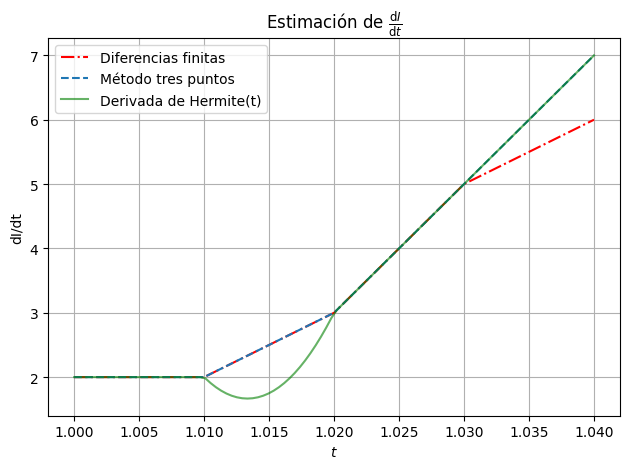

In [ ]:
# Gráficas de la derivada por estimación

# 3) Polinomio de interpolación para dI/dt
# Interpolación por el Hermite (se estimaron las derivadas)
chs = CubicHermiteSpline(df_1['Tiempo (s)'], df_1['Corriente (A)'], deriv_tres_puntos)
# Obtener la derivada del polinomio de interpolación
hermite_diff = chs.derivative()

# Dominio de interpolación
t = np.linspace(df_1['Tiempo (s)'].min(), df_1['Tiempo (s)'].max(), 100)

# Gráfico
plt.title(r'Estimación de $\frac{\mathrm{d}I}{\mathrm{d}t}$')
plt.plot(df_1['Tiempo (s)'], deriv_diff_fint, '-.', color='r', label='Diferencias finitas')
plt.plot(df_1['Tiempo (s)'], deriv_tres_puntos, '--', label='Método tres puntos')
plt.plot(t, hermite_diff(t), color='g', linestyle='solid', label='Derivada de Hermite(t)', alpha=0.6)
plt.xlabel(r'$t$')
plt.ylabel('dI/dt')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Los métodos de diferenciación arrojan segmentos en los que los gráficos se superponen, lo que indica un buen ajuste por los tres métodos. Sin embargo, dichos ajustes también presentan grandes diferencias en dos secciones del gráfico, donde dos de ellos se superponen y uno dista en exceso.
Para una conclusión más robusta haría falta una interpolación por métodos diferentes para comparar más opciones. Sin embargo, los tramos de la derivada pueden ser mejor estimados por métodos distintos, lo que lleva a un uso variado de diferenciación numérica.

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

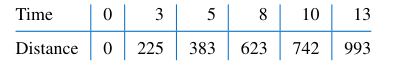



In [ ]:
# Datos de la tabla
datos = {'Tiempo' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
         'Distancia': [2, 4, 5, 7, 10, 11, 15, 17, 19, 20, 22]}
df_2 = pd.DataFrame(datos)

# Calcular la velocidad instantánea usando diferencias finitas y crear su DataFrame.
velocidad = pd.DataFrame(diferencias_finitas(df_2['Tiempo'], df_2['Distancia']),
                         columns=['Velocidad'])

In [ ]:
# DataFrame con la información que contiene la velocidad estimada
info = pd.concat([df_2, velocidad], axis=1)
info.style.hide(axis="index")

Tiempo,Distancia,Velocidad
1,2,2
2,4,1
3,5,1
4,7,2
5,10,2
6,11,2
7,15,3
8,17,2
9,19,1
10,20,1


Velocidad estimada para t=12 [T]: -3.0 [M/T]



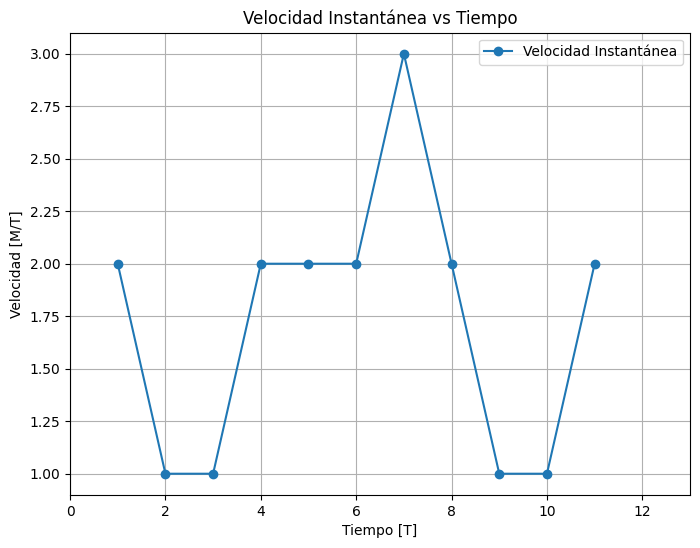

In [ ]:
# Interpolación de Hermite
chs_velocidad = CubicHermiteSpline(info['Tiempo'],info['Distancia'], info['Velocidad'])
velocidad_12 = chs_velocidad.derivative()(12)

# Estimación de la velocidad para t= 12 [T].
print(f"Velocidad estimada para t=12 [T]: {velocidad_12} [M/T]")
print()

# Gráfico de velocidad vs Tiempo
plt.figure(figsize=(8, 6))
plt.plot(info['Tiempo'], info['Velocidad'], marker='o', linestyle='-', label="Velocidad Instantánea")
plt.xlabel("Tiempo [T]")
plt.xlim(0, 13)
plt.ylabel("Velocidad [M/T]")
plt.title("Velocidad Instantánea vs Tiempo")
plt.grid(True)
plt.legend()
plt.tight_layout
plt.show()

# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

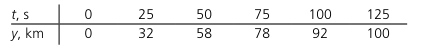

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [ ]:
# a) Velocidad por diferencias finitas
info = {'Tiempo (s)': [0, 25, 50, 75, 100, 125],
        'Distancia (km)': [0, 32, 58, 78, 92, 100]}
df_3 = pd.DataFrame(info)
df_3

,Tiempo (s),Distancia (km)
0,0,0
1,25,32
2,50,58
3,75,78
4,100,92
5,125,100


In [ ]:
df_3.rename(columns={'Distancia (km)':'Distancia (m)'}, inplace=True)
df_3['Distancia (m)'] = df_3['Distancia (m)'].apply(lambda d: 1000 * d)
df_3

,Tiempo (s),Distancia (m)
0,0,0
1,25,32000
2,50,58000
3,75,78000
4,100,92000
5,125,100000


In [ ]:
# Velocidad del cohete (m/s)
velocidad = diferencias_finitas(df_3['Tiempo (s)'], df_3['Distancia (m)'])
df_3 = pd.concat([df_3, pd.DataFrame({'Velocidad (m/s)': velocidad})], axis=1)
df_3

,Tiempo (s),Distancia (m),Velocidad (m/s)
0,0,0,1280
1,25,32000,1160
2,50,58000,920
3,75,78000,680
4,100,92000,440
5,125,100000,320


In [ ]:
# Aceleración del cohete (m * s ** -2)
aceleracion = diferencias_finitas(df_3['Tiempo (s)'], df_3['Velocidad (m/s)'])
df_3 = pd.concat([df_3, pd.DataFrame({'Aceleración (m/s^2)': aceleracion})], axis=1)
df_3

,Tiempo (s),Distancia (m),Velocidad (m/s),Aceleración (m/s^2)
0,0,0,1280,-4
1,25,32000,1160,-7
2,50,58000,920,-9
3,75,78000,680,-9
4,100,92000,440,-7
5,125,100000,320,-4


#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [ ]:
# Definición de variables simbólicas y potencial eléctrico
k, q, R, z, Vz, Ez= sp.symbols('k q_tot R, z V E_z')
E, V = sp.symbols(r'\tilde{E_{z}} \tilde{V}')

expr = k * q / sp.sqrt(z ** 2 +  R ** 2)
potencial = sp.Eq(Vz, expr)
display(potencial)

Eq(V, k*q_tot/sqrt(R**2 + z**2))

In [ ]:
# a) Calcular el campo eléctrico
dev_parcial = sp.diff(expr, z)
campo_z = sp.Eq(Ez, -dev_parcial)
display(campo_z)

Eq(E_z, k*q_tot*z/(R**2 + z**2)**(3/2))

Si
$$V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}$$
$$\Rightarrow \frac{V}{kq_{tot}} = \frac{1}{\sqrt{z^2+R^2}}$$
Si $\tilde{V}=\frac{V}{kq_{tot}}$, se sigue que:
$$\tilde{V}=\frac{1}{\sqrt{z^2+R^2}}$$.
Luego, la derivada parcial de $\tilde{V}$ respecto a $z$ corresponde a:
$$-\frac{\partial \tilde{V}}{\partial z} = \tilde{E}_{z}.$$
En consecuencia, a partir de nuestra última expresión simbólica con Sympy, tenemos que el campo eléctrico en z reescalado consiste solamemente de $\frac{E_{z}}{kq_{tol}}$.

In [ ]:
# Campo eléctrico en z reescalado
campo_z = sp.Eq(E, -sp.diff(expr / (k * q), z))
display(campo_z)

Eq(\tilde{E_{z}}, z/(R**2 + z**2)**(3/2))

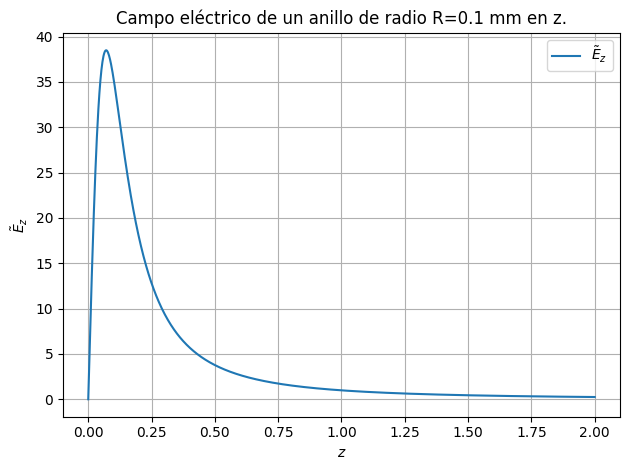

In [ ]:
# Cálculo del campo eléctrico para z > 0 y R = 0.1 [mm]
campo_z = sp.lambdify((z, R), campo_z.rhs, 'numpy')  # <sp.Eq>.rhs toma la parte
                                                     # derecha de la ecuación.

z_vals = np.linspace(0, 2, 1000)

# Gráfica
plt.figure()
plt.title("Campo eléctrico de un anillo de radio R=0.1 mm en z.")
plt.plot(z_vals, campo_z(z_vals, R=0.1), label=r'$\tilde{E}_{z}$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\tilde{E}_{z}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# b) Cálculo del campo eléctrico en z por medio de np.grad

# De la ecuación del potencial, pasamos a una función lambda la parte derecha
# de la expresión por <sp.Eq>.rhs

potencial_rees = sp.Eq(V, expr / (k * q))
display(potencial_rees)

Eq(\tilde{V}, 1/sqrt(R**2 + z**2))

Magnitud campo eléctrico en z=0.1 mm por np.grad: -35.33586988380034



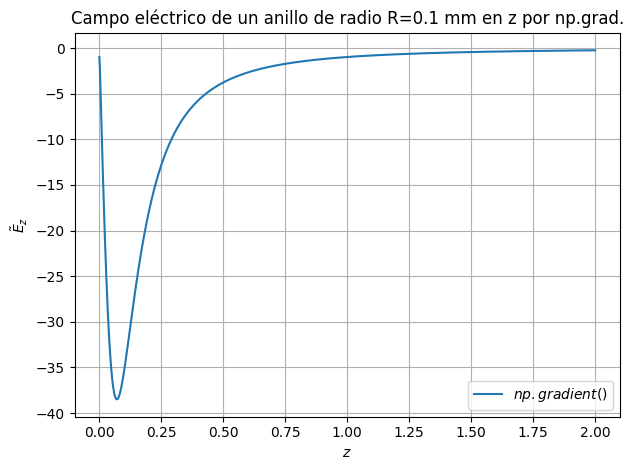

In [ ]:
## Función potencial_rees
funcion_pot_rees = sp.lambdify((z, R), potencial_rees.rhs, 'numpy')

# Para la función del potencial reescalada
potencial = funcion_pot_rees(z_vals, R=0.1)

# Campo eléctrico por medio de np.grad
campo_z_grad = np.gradient(potencial, z_vals)

# Obtener el campo en z=0.1 mm por np.grad
index = np.argmin(np.abs(z_vals - 0.1))
campo_z_grad_01 = campo_z_grad[index]

print(f"Magnitud campo eléctrico en z=0.1 mm por np.grad: {campo_z_grad_01}")
print()

# Gráfica
plt.figure()
plt.title("Campo eléctrico de un anillo de radio R=0.1 mm en z por np.grad.")
plt.plot(z_vals, campo_z_grad, label=r'$np.gradient()$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\tilde{E}_{z}$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Es importante notar el reflejo de los gráficos para el cálculo del campo eléctrico. En el método del gradiente, las derivadas son calculadas por diferencias finitas, mientras que por la derivada parcial respecto a z, el campo es el negativo de dicha derivada. Como tal, esta sutiliza marcha la diferencia en la orientación de los gráficos.